In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
train = pd.read_csv('/Users/mac/Documents/Courses/Python for Data Science/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

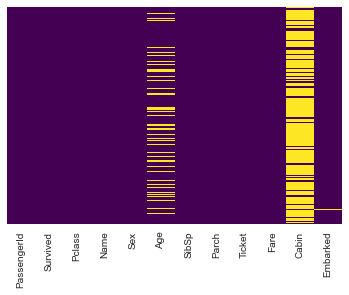

In [213]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [214]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

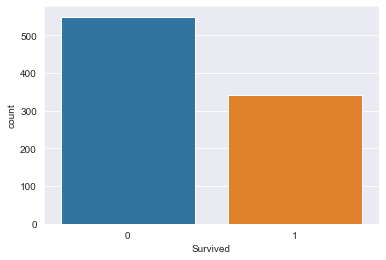

In [215]:
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

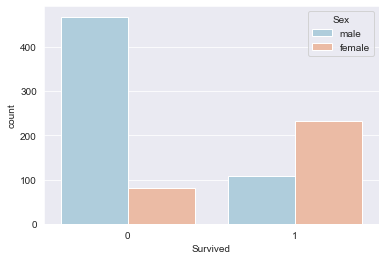

In [216]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

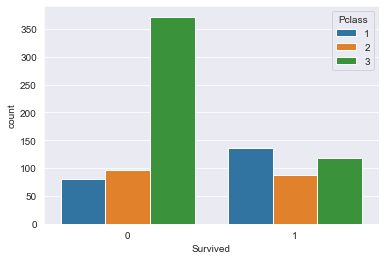

In [218]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

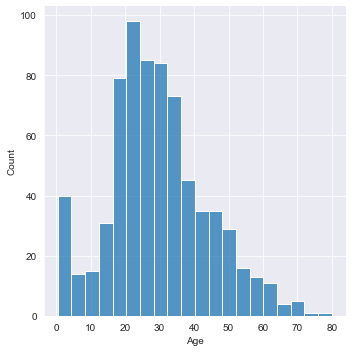

In [219]:
sns.displot(train['Age'])

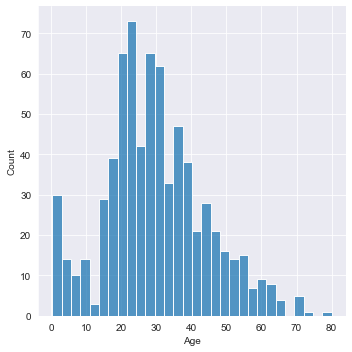

In [220]:
sns.displot(train['Age'].dropna(), kde = False, bins = 30)

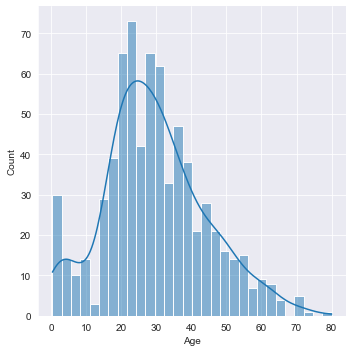

In [221]:
sns.displot(train['Age'].dropna(), kde = True, bins = 30)

<AxesSubplot:ylabel='Frequency'>

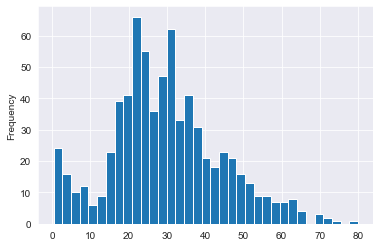

In [222]:
train['Age'].plot.hist(bins = 35)

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

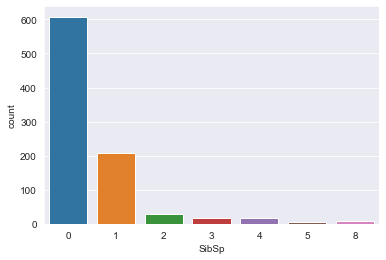

In [224]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

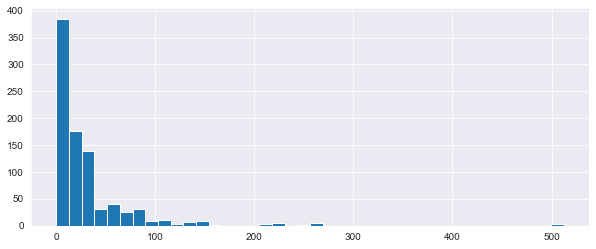

In [225]:
train['Fare'].hist(bins = 40, figsize = (10,4))

In [226]:
import cufflinks as cf

In [227]:
cf.go_offline()

In [228]:
train['Fare'].iplot(kind = 'hist', bins = 30)

# Data Cleaning

<AxesSubplot:>

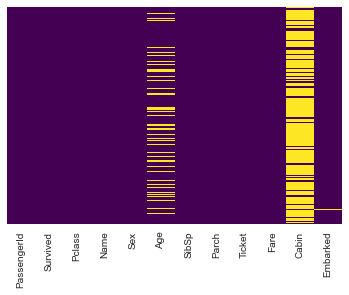

In [229]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [33]:
#Imputation
#Filling missing data with average age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

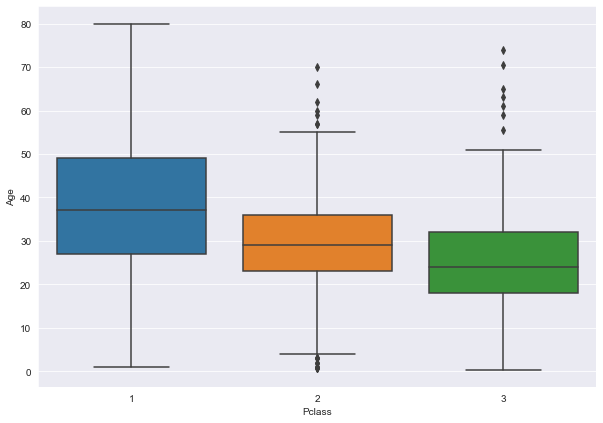

In [230]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [231]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 
        elif Pclass == 2:
            return 29
        else: 
            return 24
        
    else:
        return Age

In [232]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis = 1 )

<AxesSubplot:>

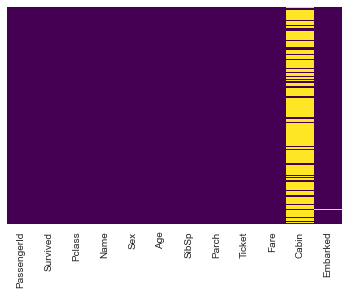

In [233]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [234]:
train.drop('Cabin', axis = 1, inplace = True)

In [235]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

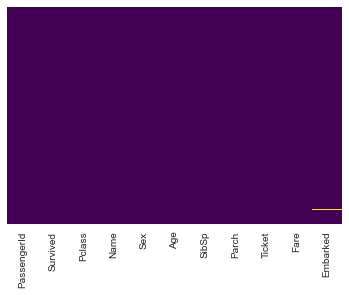

In [236]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [237]:
train[train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [238]:
train.dropna(inplace = True)
#I belive we didnt replace this because the features were categorical

<AxesSubplot:>

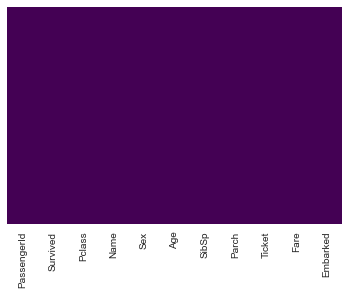

In [239]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# 2nd Step
Converting Categorical Features into Dummy Variables Using Pandas

In [240]:
sex = pd.get_dummies(train['Sex'],drop_first = True )
#Issue will be mutlicollinearity, solved by drop_first

In [181]:
sex = pd.get_dummies(train['Sex'],drop_first = True )
embark = pd.get_dummies(train['Embarked'],drop_first = True )
embark.head()
train = pd.concat([train, sex, embark], axis = 1)
train.head()
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train.head()
train.drop('PassengerId', axis = 1, inplace = True)
train.head()

KeyError: 'Sex'

In [241]:
embark = pd.get_dummies(train['Embarked'],drop_first = True )

In [242]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [243]:
train = pd.concat([train, sex, embark], axis = 1)

In [244]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [245]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [246]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [247]:
train.drop('PassengerId', axis = 1, inplace = True)

In [248]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
#Pclass is a categorical class, we could have done PD.get dummies with this, will try it later

# Train Machine Learning Classification Model

In [249]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
logmodel = LogisticRegression(solver = 'liblinear')

In [254]:
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [305]:
predictions = logmodel.predict(X_test)

In [256]:
from sklearn.metrics import classification_report

In [306]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [258]:
from sklearn.metrics import confusion_matrix

In [259]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]])

# My personal test.
1. Clean the test and predict with it. - done
2. Classify Pclass on both Train and Test and predict with it.
3. Try to predict with the normal data

In [260]:
test = pd.read_csv('/Users/mac/Documents/Courses/Python for Data Science/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')

In [261]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

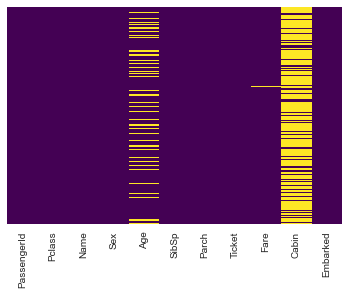

In [262]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

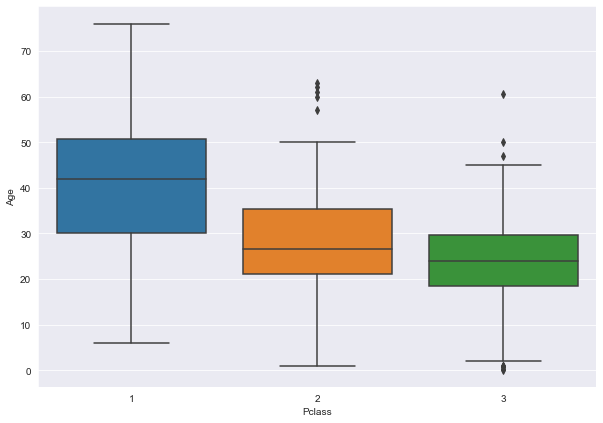

In [263]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = test)

In [264]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42 
        elif Pclass == 2:
            return 26
        else: 
            return 23
        
    else:
        return Age

In [265]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_test,axis = 1 )

<AxesSubplot:>

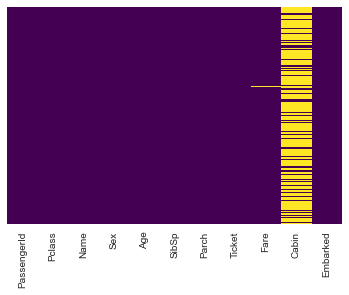

In [266]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [267]:
test.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

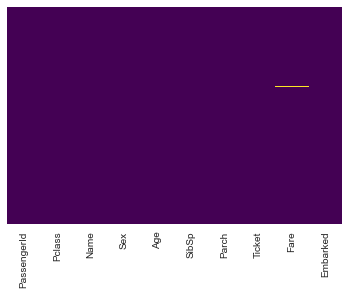

In [268]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [269]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [270]:
test[(test['Pclass'] == 3) & (test['SibSp'] == 0 ) & (test['Embarked'] == 'S' )]['Age'].mean()

24.694653465346533

In [272]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,23.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,23.0,0,0,359309,8.0500,S


In [277]:
test.fillna(value = 24.7, inplace = True)

In [278]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


<AxesSubplot:>

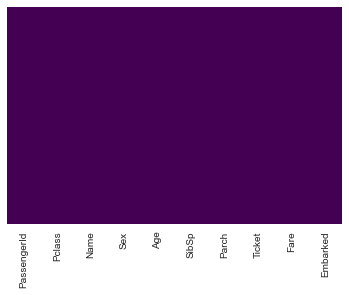

In [279]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [280]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first = True )
embark = pd.get_dummies(train['Embarked'],drop_first = True )
embark.head()
train = pd.concat([train, sex, embark], axis = 1)
train.head()
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train.head()
train.drop('PassengerId', axis = 1, inplace = True)
train.head()

In [281]:
sex = pd.get_dummies(test['Sex'],drop_first = True)

In [282]:
embark = pd.get_dummies(test['Embarked'],drop_first = True )

In [283]:
test = pd.concat([test, sex, embark], axis = 1)

In [284]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [285]:
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [286]:
test.drop('PassengerId', axis = 1, inplace = True)

In [ ]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [287]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [288]:
logmodel.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 2. Classify Pclass on both Train and Test and predict with it.

In [291]:
train1 = train[:]

In [292]:
train1

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [294]:
pclass = pd.get_dummies(train['Pclass'],drop_first = True )

In [295]:
train1 = pd.concat([train1, pclass], axis = 1)

In [297]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [298]:
train1.drop('Pclass', axis = 1, inplace = True)

In [299]:
train1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [300]:
X1 = train1.drop('Survived', axis = 1)
y1 = train['Survived']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)
logmodel1 = LogisticRegression(solver = 'liblinear')
logmodel1.fit(X1_train, y1_train)


LogisticRegression(solver='liblinear')

In [302]:
predictions1 = logmodel1.predict(X1_test)

In [303]:
print(classification_report(y1_test, predictions1))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [307]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [304]:
confusion_matrix(y1_test, predictions1)
#new

array([[150,  13],
       [ 36,  68]])

In [308]:
confusion_matrix(y_test, predictions)
#former

array([[148,  15],
       [ 36,  68]])

# New model performed better
F1 Score increased and Accuracy increased by .1